# 🧩 HRRR in Zarr Format

Selections of the HRRR archive are made available in [Zarr](https://zarr.readthedocs.io/en/stable/) format on [AWS](https://registry.opendata.aws/noaa-hrrr-pds/).

There are two ways to access zarr data with xarray

1. with `fsspec`
1. with `s3fs`

In [2]:
import zarr
import fsspec
import xarray as xr

In [3]:
# Lets grab a forecast file using fsspec

url = "s3://hrrrzarr/sfc/20200903/20200903_00z_fcst.zarr/2m_above_ground/TMP/2m_above_ground/"

ds = xr.open_zarr(fsspec.get_mapper(url, anon=True))
ds.TMP

<xarray.DataArray 'TMP' (time: 36, projection_y_coordinate: 1059,
                         projection_x_coordinate: 1799)>
[68585076 values with dtype=float16]
Dimensions without coordinates: time, projection_y_coordinate,
                                projection_x_coordinate
Attributes:
    GRIB_PARAM:   [2, 0, 0, 0]
    coordinates:  forecast_reference_time forecast_period
    long_name:    2m_above_ground/TMP
    units:        K

In [4]:
import xarray as xr
import s3fs

In [5]:
# Let's grab an analysis file using s3fs

fs = s3fs.S3FileSystem(anon=True)
url = "hrrrzarr/sfc/20200903/20200903_00z_anl.zarr/2m_above_ground/TMP/2m_above_ground/"
store = s3fs.S3Map(root=url, s3=fs, check=False)
ds = xr.open_zarr(store)
ds.TMP

<xarray.DataArray 'TMP' (projection_y_coordinate: 1059,
                         projection_x_coordinate: 1799)>
[1905141 values with dtype=float16]
Dimensions without coordinates: projection_y_coordinate, projection_x_coordinate
Attributes:
    GRIB_PARAM:   [2, 0, 0, 0]
    coordinates:  forecast_reference_time time pressure height forecast_period
    long_name:    2m_above_ground/TMP
    units:        K

It looks like the projection coordinates are up a level

In [6]:
fs = s3fs.S3FileSystem(anon=True)
url = "hrrrzarr/sfc/20200903/20200903_00z_fcst.zarr/2m_above_ground/TMP"
store = s3fs.S3Map(root=url, s3=fs, check=False)
ds2 = xr.open_zarr(store)
ds2

<xarray.Dataset>
Dimensions:                  (time: 36, projection_x_coordinate: 1799,
                              projection_y_coordinate: 1059)
Coordinates:
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.698e+06 ......
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.587e+06 ......
  * time                     (time) datetime64[ns] 2020-09-03T01:00:00 ... 20...
Data variables:
    forecast_period          (time) timedelta64[ns] ...
    forecast_reference_time  datetime64[ns] ...

In [7]:
ds2.projection_x_coordinate

<xarray.DataArray 'projection_x_coordinate' (projection_x_coordinate: 1799)>
array([-2697520.142522, -2694520.142522, -2691520.142522, ...,  2690479.857478,
        2693479.857478,  2696479.857478])
Coordinates:
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.698e+06 ......
Attributes:
    standard_name:  projection_x_coordinate
    units:          m

In [8]:
ds2.forecast_reference_time

<xarray.DataArray 'forecast_reference_time' ()>
[1 values with dtype=datetime64[ns]]
Attributes:
    standard_name:  forecast_reference_time

## The full variable (all chunks)

In [9]:
ds.TMP

<xarray.DataArray 'TMP' (projection_y_coordinate: 1059,
                         projection_x_coordinate: 1799)>
[1905141 values with dtype=float16]
Dimensions without coordinates: projection_y_coordinate, projection_x_coordinate
Attributes:
    GRIB_PARAM:   [2, 0, 0, 0]
    coordinates:  forecast_reference_time time pressure height forecast_period
    long_name:    2m_above_ground/TMP
    units:        K

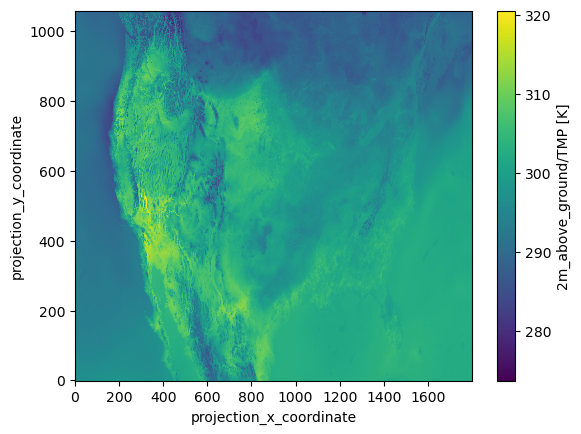

In [10]:
ds.TMP.plot()

Now lets get only part of the variable; the Western United States chunck

In [11]:
ds.TMP[:, :500]

<xarray.DataArray 'TMP' (projection_y_coordinate: 1059,
                         projection_x_coordinate: 500)>
[529500 values with dtype=float16]
Dimensions without coordinates: projection_y_coordinate, projection_x_coordinate
Attributes:
    GRIB_PARAM:   [2, 0, 0, 0]
    coordinates:  forecast_reference_time time pressure height forecast_period
    long_name:    2m_above_ground/TMP
    units:        K

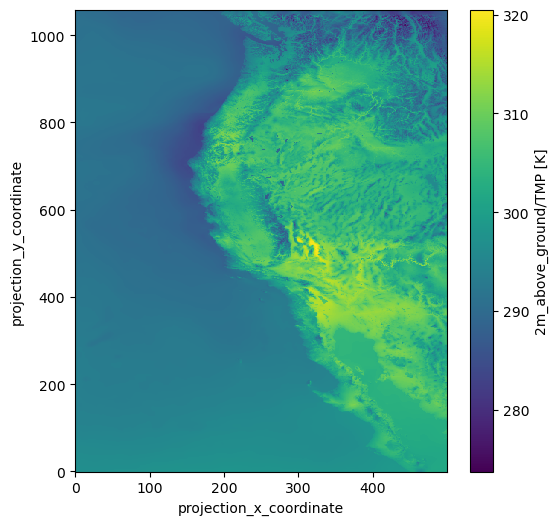

In [12]:
ds.TMP[:, :500].plot(figsize=(6, 6))